In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

# Load the Data

In [89]:
data = pd.read_csv(r"C:\Users\otpok\Kaggle\.data\ECommerce_consumer behaviour.csv")
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


# Preprocessor

In [90]:
# Calcular o percentual de dados faltantes
data.isnull().sum() / 2019501 * 100

order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.157066
product_id                0.000000
add_to_cart_order         0.000000
reordered                 0.000000
department_id             0.000000
department                0.000000
product_name              0.000000
dtype: float64

In [91]:
# Tentando entender a variável 'days_since_prior_order'
selecao = ~data['days_since_prior_order'].isnull()
data[selecao]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
22,1201011,147243,14,0,16,3.0,94,1,0,7,beverages,tea
23,1201011,147243,14,0,16,3.0,83,2,0,4,produce,fresh vegetables
24,1201011,147243,14,0,16,3.0,83,3,1,4,produce,fresh vegetables
25,1201011,147243,14,0,16,3.0,24,4,1,4,produce,fresh fruits
26,1201011,147243,14,0,16,3.0,120,5,1,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [92]:
data[selecao]['days_since_prior_order'].unique()

array([ 3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12., 11.,
        2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17., 22.,
       26., 24., 16., 23., 27.])

A variável 'days_since_prior_order' representa os dias desde a última compra. Os dados Nulos dessa coluna devem significar que essa é a primeira compra do usuário. Não podemos excluir esses dados já que são usuários importantes para análises futuras. Preencher com 0 também não faz sentido. Irei preencher com -1 para possuir dados numéricos porém que deixem explicitos que essa representação não faz sentido para o contexto, logo representa valores nulos.

Irei criar uma nova variável, que irá representar a quantidade de proutos comprados em uma compra única.

In [93]:
data['amount_products_order'] = data.groupby('order_id')['product_id'].transform('count')

In [94]:
data.fillna(-1, inplace=True)

### Tipo dos dados
É importante analisarmos se os dados estão armazenados nos seus tipos mais adequado tanto para manipulações futuras, quanto para complexidade e armazenamento.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  amount_products_order   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 200.3+ MB


De cara vemos que a variável 'days_since_prior_order' está armazenada como float64 porém só faz sentido armazenar dados inteiros, portanto podemos fazer esa alteração visando reduzir armazenamento e tempo de execução.

In [96]:
data['days_since_prior_order'] = data['days_since_prior_order'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int32 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
 12  amount_products_order   int64 
dtypes: int32(1), int64(10), object(2)
memory usage: 192.6+ MB


Analisaremos as variáveis categoricas

In [97]:
data['department'].unique()

array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

In [98]:
data.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        32
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
amount_products_order         82
dtype: int64

No momento, não achei necessário codificar essas variáveis, trabalharemos com elas dessa maneira.

# Análise Descritiva 

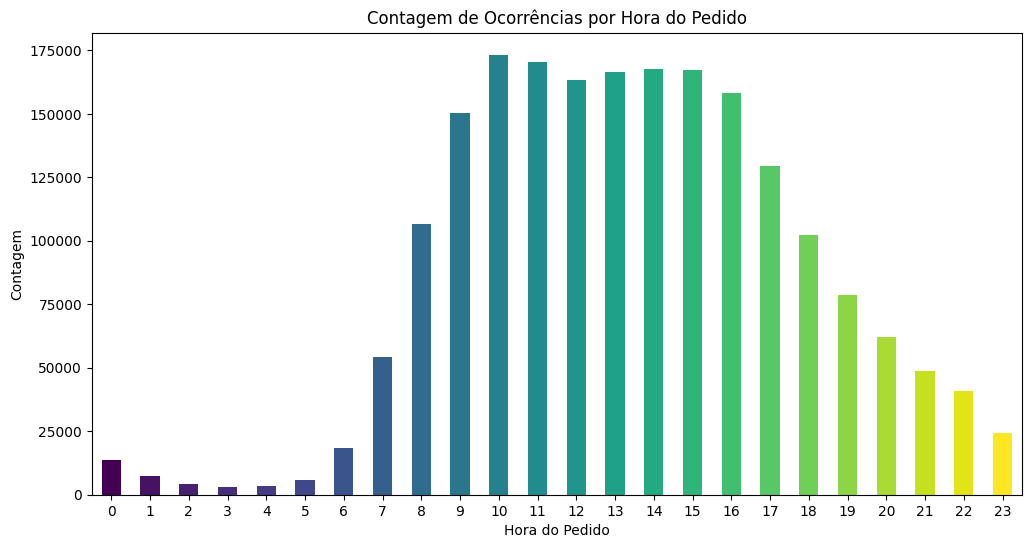

In [99]:
# Dados para o gráfico de barras
counts = data['order_hour_of_day'].value_counts().sort_index()  # Ordenando os valores

#Definindo paleta de cores
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# Plotando o gráfico de barras com cores graduais
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color=colors)
plt.title('Contagem de Ocorrências por Hora do Pedido')
plt.xlabel('Hora do Pedido')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()


A variável que representa a hora do pedido pode seguir uma distribuição normal? É uma hipótese interessante

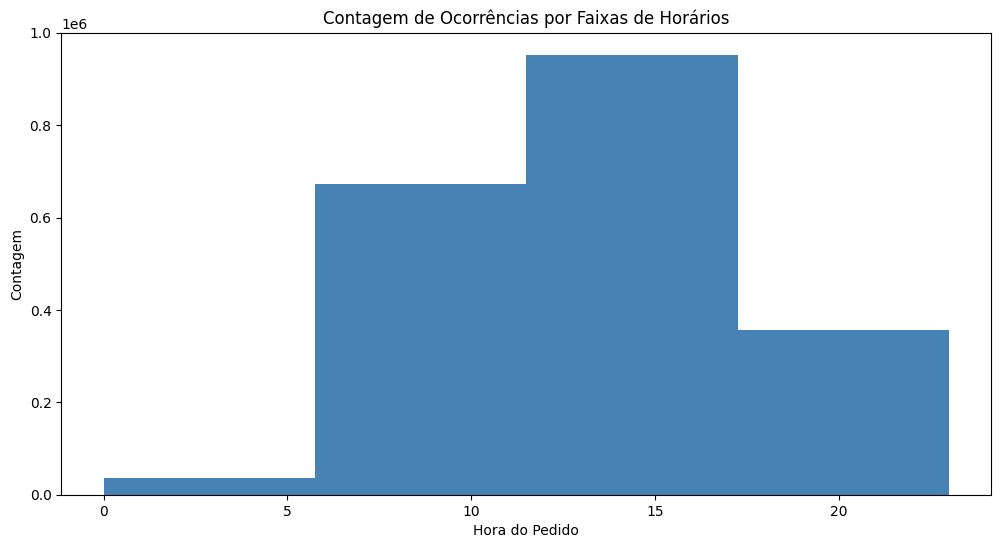

In [100]:
plt.figure(figsize=(12, 6))
plt.hist(data['order_hour_of_day'], bins=4, color='steelblue')
plt.title('Contagem de Ocorrências por Faixas de Horários')
plt.xlabel('Hora do Pedido')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()

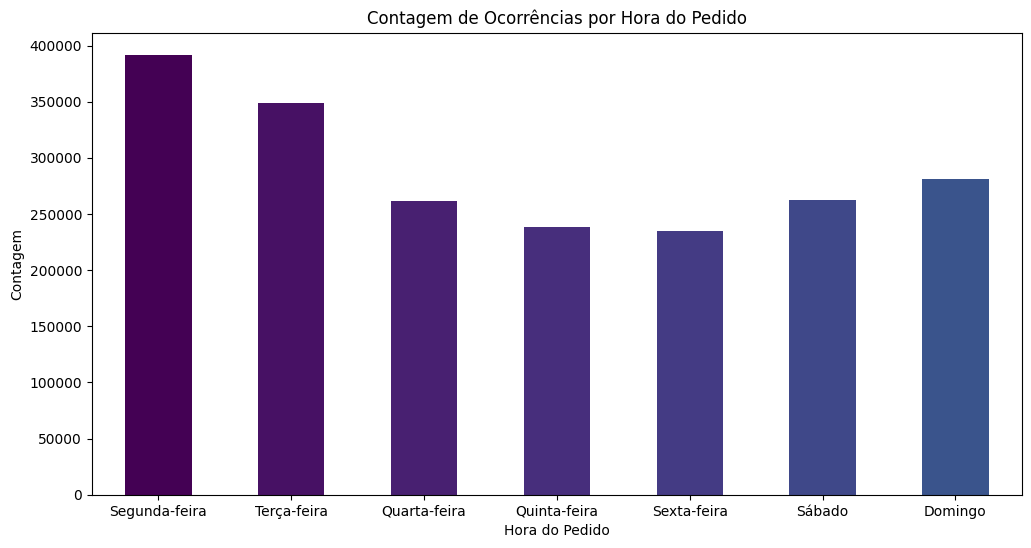

In [101]:
# Dados para o gráfico de barras
counts = data['order_dow'].value_counts().sort_index()  # Ordenando os valores

dias_da_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# Plotando o gráfico de barras com cores graduais
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color=colors)
plt.title('Contagem de Ocorrências por Hora do Pedido')
plt.xlabel('Hora do Pedido')
plt.ylabel('Contagem')
plt.xticks(np.arange(7), [dias_da_semana[dia] for dia in range(7)], rotation=0)
plt.show()


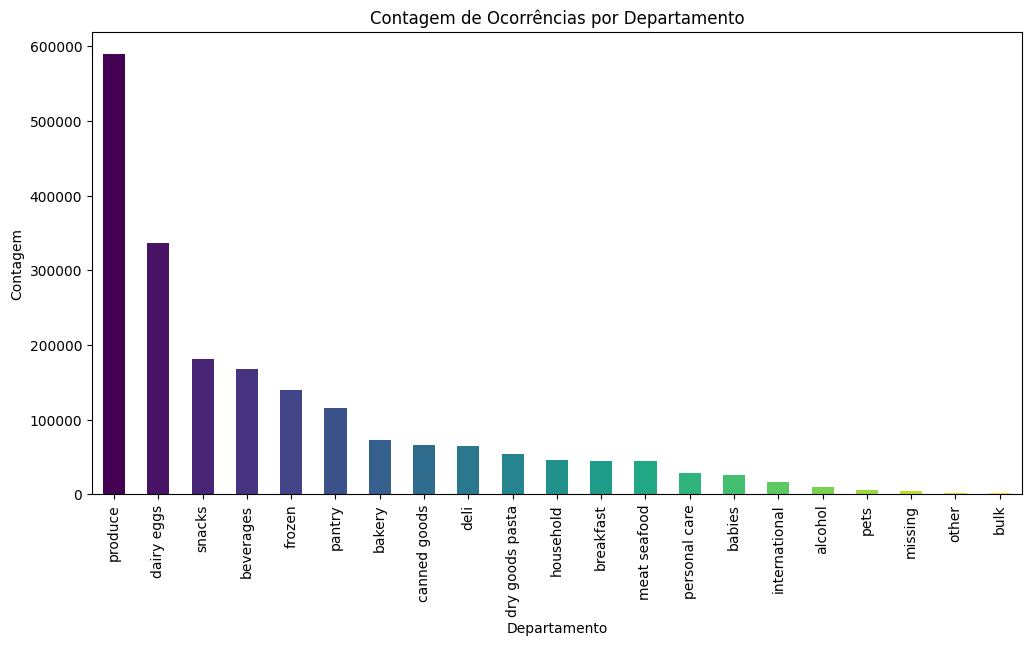

In [102]:
# Dados para o gráfico de barras
counts = data['department'].value_counts()

# Criando uma paleta de cores gradual usando 'viridis'
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# Plotando o gráfico de barras com cores graduais
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color=colors)
plt.title('Contagem de Ocorrências por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.show()

<Axes: >

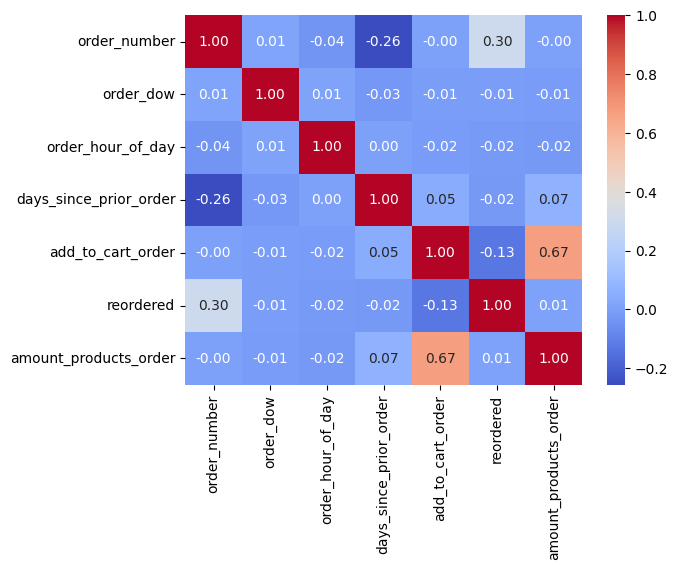

In [103]:
data_numeric = data.drop(['department', 'product_name', 'order_id', 'user_id', 'product_id', 'department_id'], axis=1)

correlation_matrix = data_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})

In [108]:
data_preprocessed = data.drop(['product_name', 'order_id', 'user_id', 'department'], axis=1)

A partir dessas informações podemos levantar alguns questionamentos:
- As variáveis 'order_dow' e 'order_hour_of_day', que representam o dia da semana do pedido e a hora do pedido, apresentam correlação baixa. Precisamos realizar testes para verificar se essas variáveis são realmente independentes, e a posteriori concluir como podemos interpretar o gráfico de distribuição de frequência dos horários apresentados anteriormente.
- As variáveis 'reordered' e 'order_number' apresentam correlação "alta". Porém, quão forte é a dependência dessas duas variáveis? É evidente que pessoas que refazem um pedido, acabam aumentando o número de pedidos. Contudo, pode ser que essa correlação se estenda além dessa regra.
- Alta correlação entre a quantidade de produtos em uma compra e a quantidade de produtos adicionados ao carrinho. Isso é óbvio, porém, precisamos ter atenção às nuances dessa relação.

# Hipóteses e Inferência

#### Verificar se `data['hour_of_day']` segue uma distribuição normal (teste Anderson-Darling)

In [208]:
from scipy.stats import anderson

# Dados de exemplo (substitua isso pelos seus dados)
data = [0.876, 1.234, 2.987, 4.567, 5.678, 6.789, 7.890]

# Executa o teste de Anderson-Darling
result = anderson(data)

# Exibe o resultado do teste
print("Estatística de teste:", result.statistic)
print("Valores críticos:", result.critical_values)
print("Níveis de significância correspondentes:", result.significance_level)

# Avalia o resultado do teste
alpha = 0.05
if result.statistic > result.critical_values[2]:
    print("Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula)")
else:
    print("Os dados parecem seguir uma distribuição normal (não podemos rejeitar a hipótese nula)")


Estatística de teste: 0.20997254510649022
Valores críticos: [0.543 0.618 0.742 0.865 1.029]
Níveis de significância correspondentes: [15.  10.   5.   2.5  1. ]
Os dados parecem seguir uma distribuição normal (não podemos rejeitar a hipótese nula)


Isso é um resultado muito satisfatório, dados que indicam seguir uma distribuição normal possuem uma facilidade maior para serem interpretados, podemos usar os conhecimentos que conhecemos sobre essa distribuição.

# Clustering

In [198]:
data_preprocessed.columns

Index(['order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'amount_products_order'],
      dtype='object')

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

def f_KMeans_silhouette(i, data_numeric):
    # Dividindo os dados em treino e teste
    train_data, test_data = train_test_split(data_numeric, test_size=0.001, random_state=42)

    # Normalizando os dados
    train_values = Normalizer().fit_transform(train_data.values)
    test_values = Normalizer().fit_transform(test_data.values)

    # Ajustando o modelo KMeans aos dados de treino
    cluster = KMeans(n_clusters=i, n_init=10, max_iter=300)
    cluster.fit(train_values)

    # Prevendo os rótulos dos clusters nos dados de teste
    y_pred = cluster.predict(test_values)

    # Calculando o coeficiente de Silhouette nos dados de teste
    silhouette = metrics.silhouette_score(test_values, y_pred, metric='euclidean')
    return silhouette

In [153]:
def f_KMeans_DB(i, data_numeric):
    # Dividindo os dados em treino e teste
    train_data, test_data = train_test_split(data_numeric, test_size=0.001, random_state=42)

    # Normalizando os dados
    train_values = Normalizer().fit_transform(train_data.values)
    test_values = Normalizer().fit_transform(test_data.values)

    # Ajustando o modelo KMeans aos dados de treino
    cluster = KMeans(n_clusters=i, n_init=10, max_iter=300)
    cluster.fit(train_values)

    # Prevendo os rótulos dos clusters nos dados de teste
    y_pred = cluster.predict(test_values)

    # Calculando o coeficiente de Silhouette nos dados de teste
    DB = metrics.davies_bouldin_score(test_values, y_pred)
    return DB

In [156]:
list_silhouette = []
patience = 3
for i in range(10):
    silhouette = f_KMeans_silhouette(i+2, data_preprocessed)
    list_silhouette.append(silhouette)
    if i >= patience:
        for k in range(i):
            flag = 0
            if list_silhouette[i] < list_silhouette[k]:
                flag = 1
        if flag == 0:
            break

    print(f"Número de clusters: {i+2} \nSilhouette: {silhouette}")

Número de clusters: 2 
Silhouette: 0.4313428834436629
Número de clusters: 3 
Silhouette: 0.42645258545426473
Número de clusters: 4 
Silhouette: 0.27489722095358626


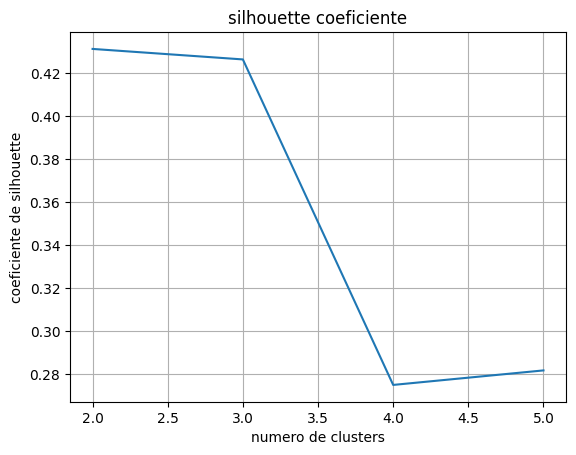

In [160]:
x = np.arange(2, len(list_silhouette) + 2)
plt.title("silhouette coeficiente")
plt.plot(x, list_silhouette)
plt.xlabel("numero de clusters")
plt.ylabel("coeficiente de silhouette")
plt.grid(True)
plt.show()

In [165]:
list_DB = []
patience = 3
for i in range(10):
    DB = f_KMeans_DB(i+2, data_preprocessed)
    list_DB.append(DB)
    if i >= patience:
        for k in range(i):
            flag = 0
            if list_DB[i] > list_DB[k]:
                flag = 1
        if flag == 0:
            break

    print(f"Número de clusters: {i+2} DB: {DB}")

Número de clusters: 2 DB: 1.2202006792618847
Número de clusters: 3 DB: 1.2520675034724353
Número de clusters: 4 DB: 1.273943452075433
Número de clusters: 5 DB: 1.419406138750975


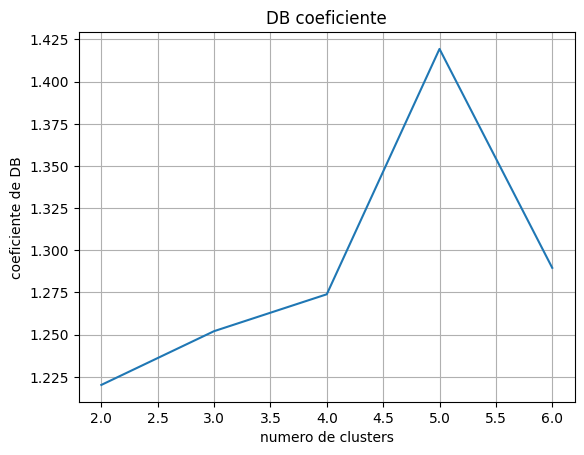

In [166]:
x = np.arange(2, len(list_DB) + 2)
plt.title("DB coeficiente")
plt.plot(x, list_DB)
plt.xlabel("numero de clusters")
plt.ylabel("coeficiente de DB")
plt.grid(True)
plt.show()

In [191]:
# Dividindo os dados em treino e teste
train_data, test_data = train_test_split(data_preprocessed, test_size=0.001, random_state=42)

# Normalizando os dados
train_values = Normalizer().fit_transform(train_data.values)
test_values = Normalizer().fit_transform(test_data.values)

# Ajustando o modelo KMeans aos dados de treino
cluster = KMeans(n_clusters=4, n_init=10, max_iter=300)
cluster.fit(train_values)

# Prevendo os rótulos dos clusters nos dados de teste
y_pred = cluster.predict(test_values)

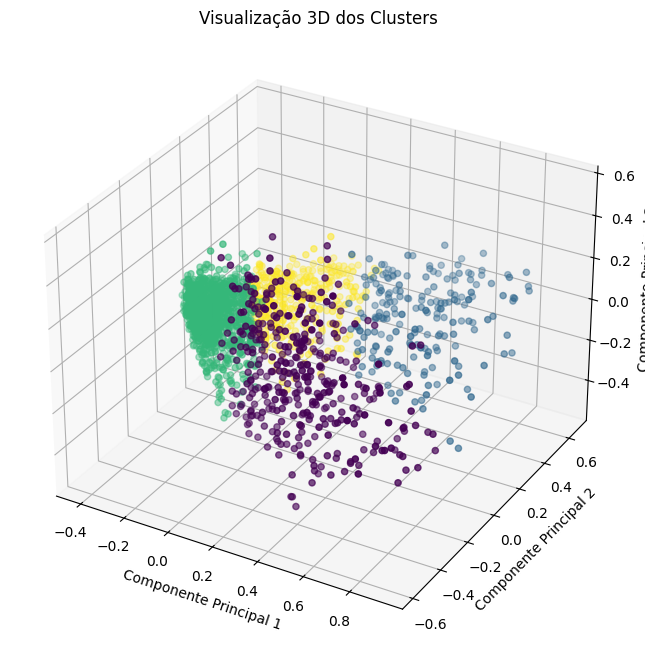

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Supondo que 'y_pred' contém os rótulos dos clusters preditos pelo modelo KMeans
# e 'data' é o DataFrame com os seus dados

# 1. Redução de dimensionalidade com PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(test_values)

# Criando a figura e o subplot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos no espaço 3D
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=y_pred, cmap='viridis')

# Adicionando rótulos e título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Visualização 3D dos Clusters')

# Mostrando o gráfico
plt.show()


# Interpretando Clusters

Agora que temos nossos clusters, precisamos consguir interpreta-los. Conseguimos separar os usuários de acordo com suas caractéristicas, porém, quais características foram levadas em conta para o grupo x ou y. Quais as características usuários de cada grupo tem em comum? E os de grupo diferentes, o que os diferem? São perguntas que tentaremos responder a seguir.

Referências:
- Nigro, Verônica. (2021). "A new approach to clustering interpretation". Medium. Disponível em: https://medium.com/bricklane-tech/a-new-approach-to-clustering-interpretation-7729cb665ee8. Acessado em 23 de março de 2024.
- Revert, Félix. (2020). "Why you should learn CatBoost now
". Medium. Disponível em: https://towardsdatascience.com/why-you-should-learn-catboost-now-390fb3895f76. Acessado em 23 de março de 2024.

In [193]:
test_data['cluster'] = y_pred

In [194]:
X_test = test_data.drop('cluster', axis=1)
y_test = test_data['cluster']

<Axes: xlabel='cluster', ylabel='count'>

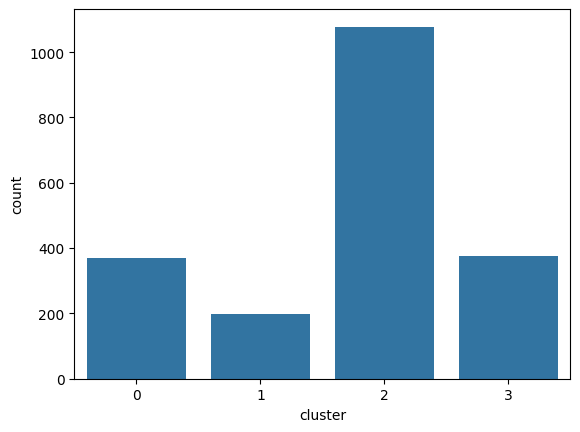

In [195]:
sns.countplot(data=test_data, x='cluster')

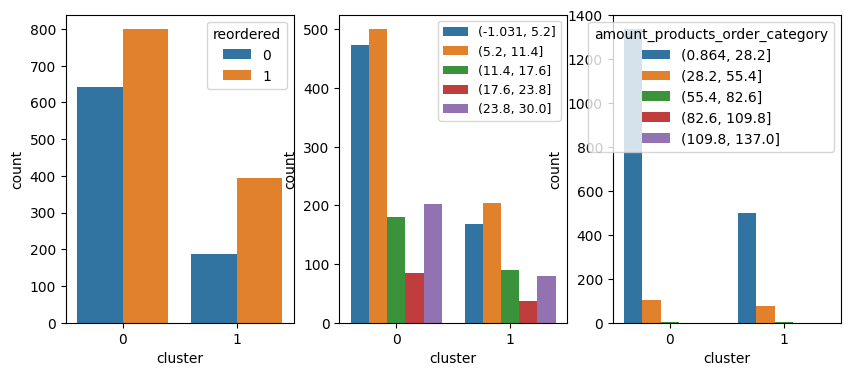

In [176]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

test_data['amount_products_order_category'] = pd.cut(test_data['amount_products_order'], bins=5)  # Altere o número de bins conforme necessário
test_data['days_since_prior_order_category'] = pd.cut(test_data['days_since_prior_order'], bins=5)  # Altere o número de bins conforme necessário

sns.countplot(data=test_data, x="cluster", hue="reordered", ax=ax1)
sns.countplot(data=test_data, x="cluster", hue="days_since_prior_order_category", ax=ax2)
sns.countplot(data=test_data, x="cluster", hue="amount_products_order_category", ax=ax3, )

ax2.legend(fontsize=9)

In [ ]:
test_data_c0 = test_data[test_data['cluster'] == 0]
test_data_c1 = test_data[test_data['cluster'] == 1]
test_data_c2 = test_data[test_data['cluster'] == 2]

In [ ]:
test_data_c0.mean()

order_number               9.162304
order_dow                  2.704188
order_hour_of_day         13.853403
days_since_prior_order    14.502618
product_id                24.609948
add_to_cart_order         11.269634
reordered                  0.562827
department_id              9.369110
amount_products_order     20.162304
cluster                    0.000000
dtype: float64

In [ ]:
test_data_c1.mean()

order_number              14.178704
order_dow                  2.731199
order_hour_of_day         13.251675
days_since_prior_order    10.623976
product_id                91.256888
add_to_cart_order          7.603127
reordered                  0.551005
department_id             10.457930
amount_products_order     14.963515
cluster                    1.000000
dtype: float64

In [ ]:
test_data_c2.mean()

order_number              45.301695
order_dow                  2.925424
order_hour_of_day         13.603390
days_since_prior_order     6.094915
product_id                42.410169
add_to_cart_order          7.816949
reordered                  0.806780
department_id              9.250847
amount_products_order     14.457627
cluster                    2.000000
dtype: float64

# Conclusões